In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib.lines import Line2D

%matplotlib inline  
sns.set_palette("hls", 8)

In [348]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [399]:
results = pd.read_csv('results/explore_test1', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall','cg','avggain'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [400]:
results = results.fillna(0)

In [401]:
domains

[418, 35774, 694, 1677]

In [402]:
results

,ranker,day,domain,correct,total,precision,recall,cg,avggain
0,popevent_popularityexplore,1,596,0,0,0.000000,0.000000,0.000000,0.000000
1,popevent_popularityexplore,1,418,110,8673,0.012683,0.050179,27.597747,0.250889
2,popevent_popularityexplore,1,35774,14669,60688,0.241712,0.079585,49.488117,0.003374
3,popevent_popularityexplore,1,13554,0,0,0.000000,0.000000,0.000000,0.000000
4,popevent_popularityexplore,1,694,19,546,0.034799,0.180000,10.754325,0.566017
5,popevent_popularityexplore,1,3336,0,2,0.000000,0.000000,0.000000,0.000000
6,popevent_popularityexplore,1,1677,10145,26287,0.385932,0.033186,43.177271,0.004256
7,popevent_popularityexplore,1,2522,0,0,0.000000,0.000000,0.000000,0.000000
8,popevent_popularityexplore,2,596,0,0,0.000000,0.000000,0.000000,0.000000
9,popevent_popularityexplore,2,418,2768,8958,0.308998,0.050336,35.916251,0.012976


In [416]:
from six import iteritems
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]
unfilled_markers = ['o', '^', 's', 'D', 'H', '+', '*', 'p']
ranker_mapping = {"coocrank":"coocrec", "poprank": "poprec", "poprank_event": "most clicked", "seqrank": "seqrec",
                 "contentrank": "stemrec", "session_coocrank": "session cooc", "session_seqrank":"session seqrec",
                 "mpc_event_24":"mpc clicks", "mpcviews": "mpcviews", "keyword_rec": "keywordrec",
                  "most_popular_topic": "most popular topic", 'session_mpc_event_0.5':"session most clicked",
                 "mpc_event": "mpc event", "session_mpc_event":"session mpc event", "mpcview":"mpc views"
                  , "poprank views":"poprank views",
                 "popevent_popularityexplore":"most clicked + popexplore",
                  "popevent_keyword": "most clicked + keyexplore", "mpc click only":"mpc click only",
                 "pop click only":"pop click only", "popevent_mpcsessionall":"most clicked + mpc"}

In [376]:
print(unfilled_markers[1])

^


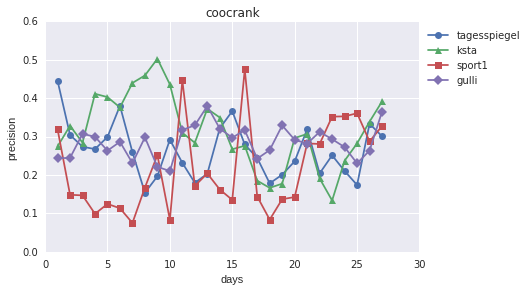

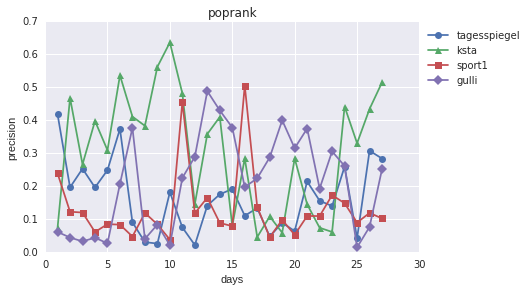

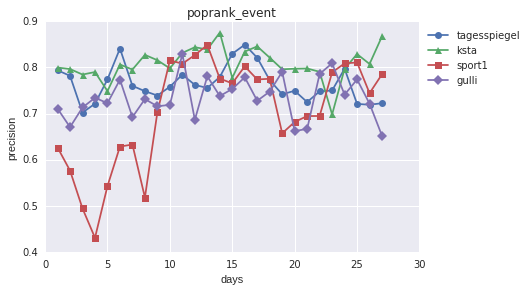

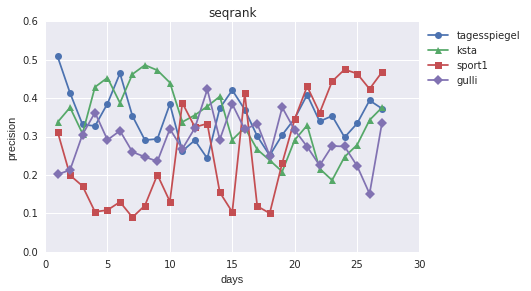

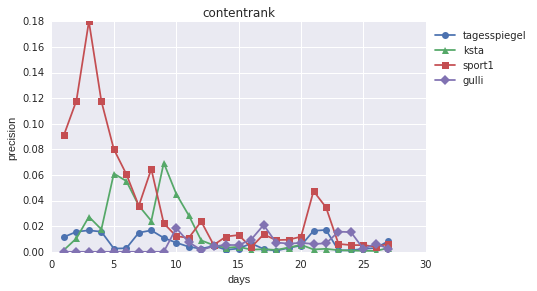

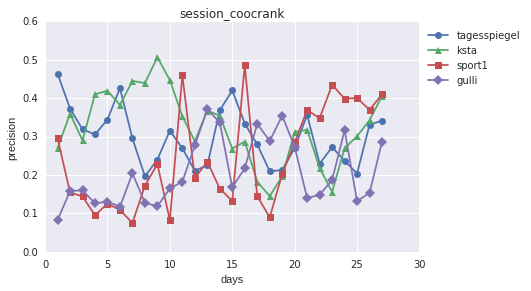

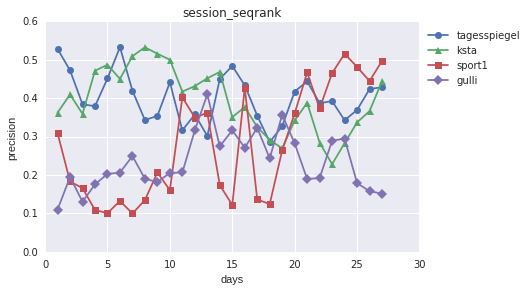

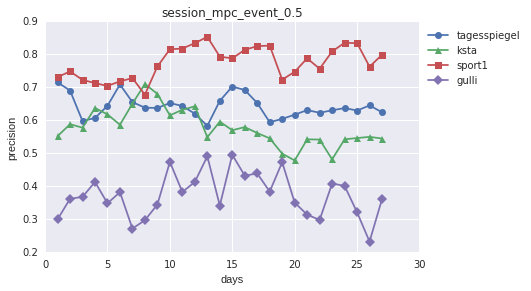

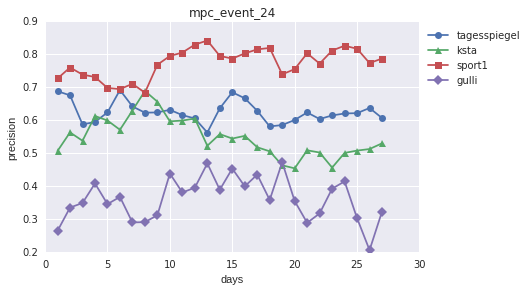

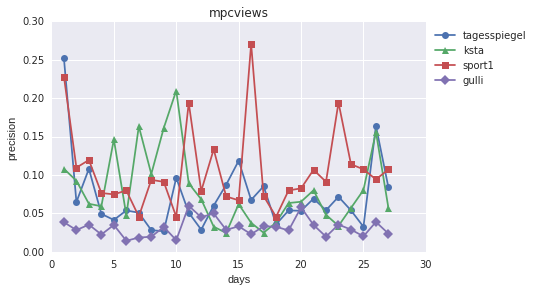

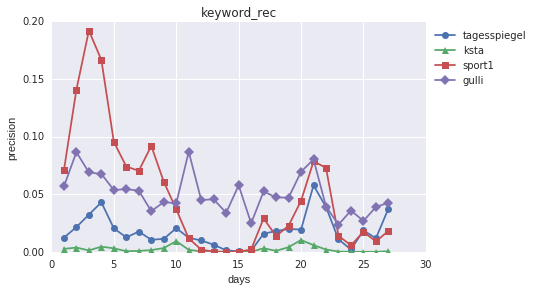

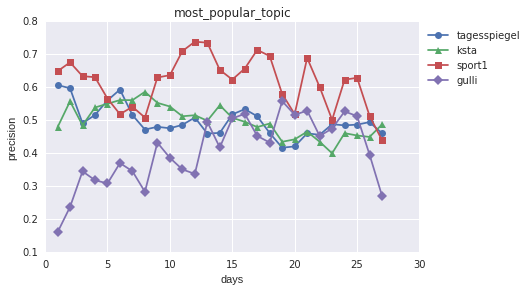

In [301]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, marker=unfilled_markers[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1


popevent_popularityexplore
1      0.012683
9      0.308998
17     0.126122
25     0.379419
33     0.236953
41     0.368555
49     0.346106
57     0.237968
65     0.547589
73     0.646833
81     0.456689
89     0.072066
97     0.167206
105    0.200332
113    0.071769
121    0.101752
129    0.028699
137    0.094817
145    0.057588
153    0.104096
161    0.070903
169    0.057810
177    0.046497
185    0.216667
193    0.259376
201    0.325004
209    0.495094
Name: precision, dtype: float64
popevent_keyword
217    0.002421
225    0.004019
233    0.001122
241    0.003597
249    0.003095
257    0.000507
265    0.000798
273    0.001270
281    0.003177
289    0.010100
297    0.002270
305    0.000114
313    0.000190
321    0.000000
329    0.000000
337    0.000000
345    0.003257
353    0.000843
361    0.002832
369    0.009556
377    0.004202
385    0.003232
393    0.000626
401    0.000000
409    0.000000
417    0.000000
425    0.000503
Name: precision, dtype: float64
popevent_mpcsessionall
434  

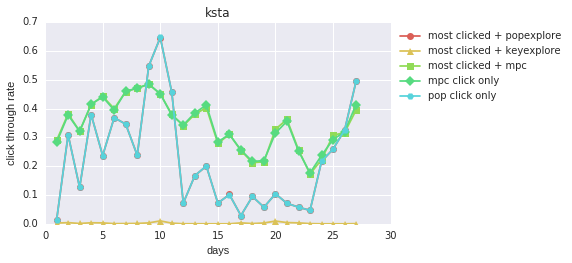

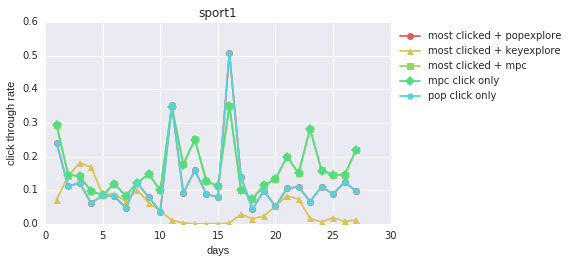

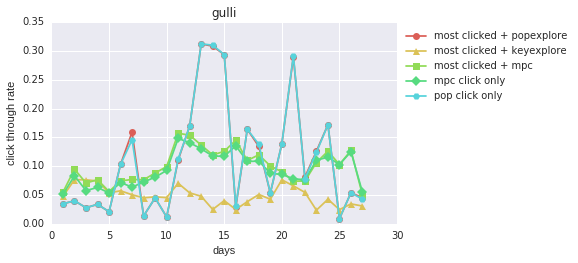

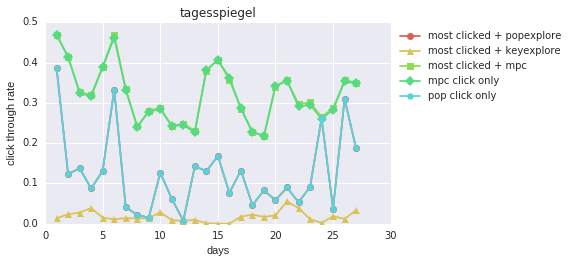

In [423]:
i=0
# newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
# newrankers = [ x for x in rankers if "session" not in x]
newrankers = [ x for x in rankers]
# explore_rankers = ['popevent_popularity', 'popevent_keyword','popevent_mpcsession']
labels = []
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.2,0.6,0.7])
        ax.set_xlabel('days')
        ax.set_ylabel('click through rate')
        ax.plot(days, precision, marker=unfilled_markers[j])
#         ax.plot(days, precision)
        ax.legend(labels, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

        

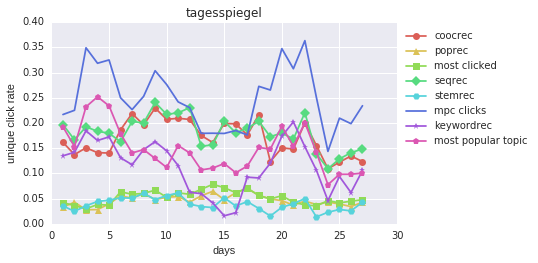

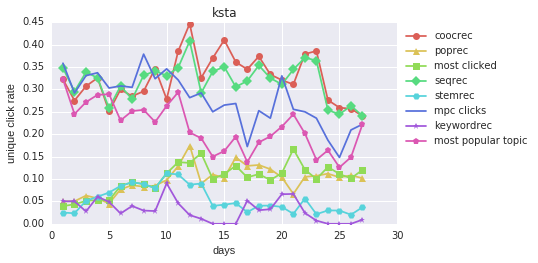

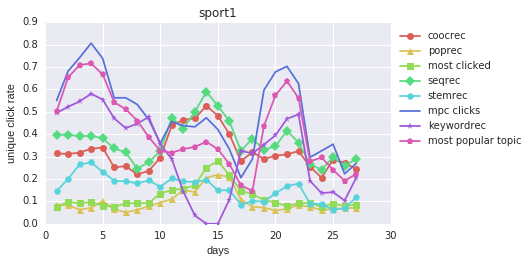

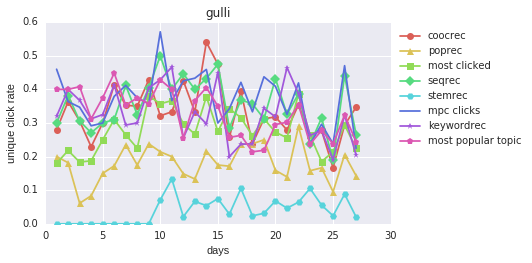

In [324]:
#recall per domain
i=0
labels = []
newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
for domain in domains:
    j=0
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.2,0.6,0.7])
        ax.set_xlabel('days')
        ax.set_ylabel('unique click rate')
        ax.plot(days, recall,  marker=unfilled_markers[j])
        ax.legend(labels, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)
        j = j +1

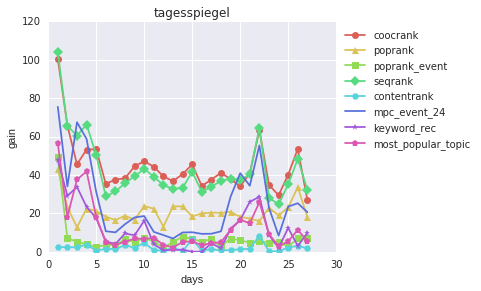

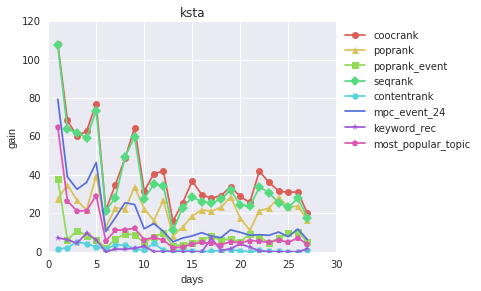

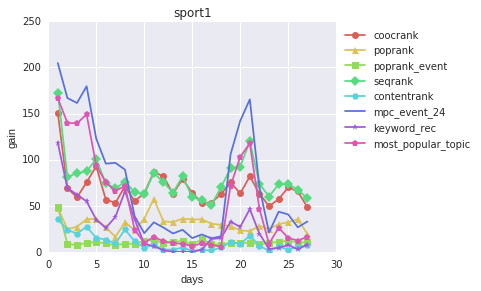

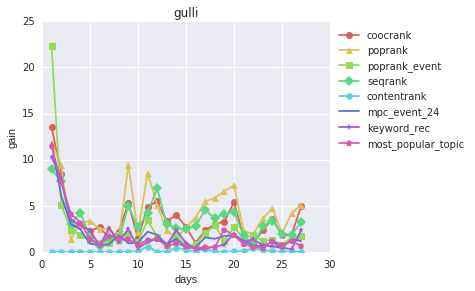

In [331]:
i=0
labels = []
newrankers = [ x for x in rankers if "session" not in x and "views" not in x]
for domain in domains:
    j=0
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in newrankers:
        labels.append(ranker_mapping[ranker])
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['cg']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('gain')
#         ax.plot(days, precision, dashes=linestyles[j])
        ax.plot(days, precision, marker=unfilled_markers[j])
        ax.legend(newrankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1

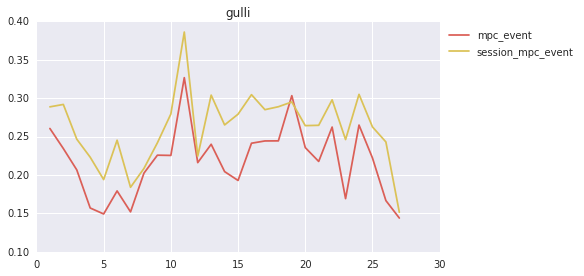

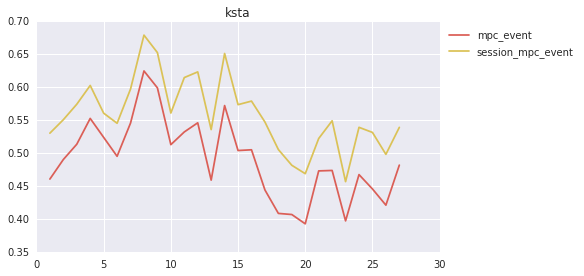

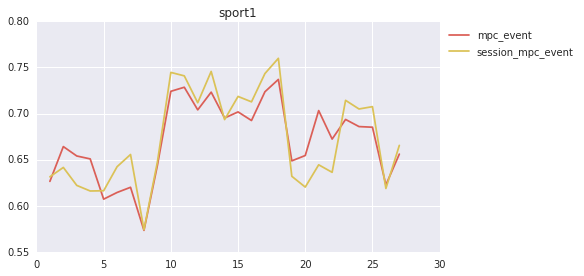

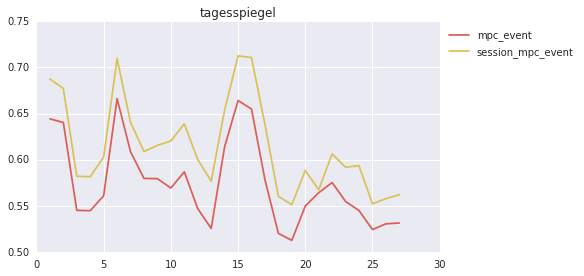

In [341]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

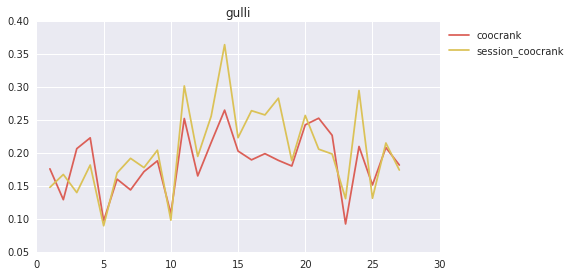

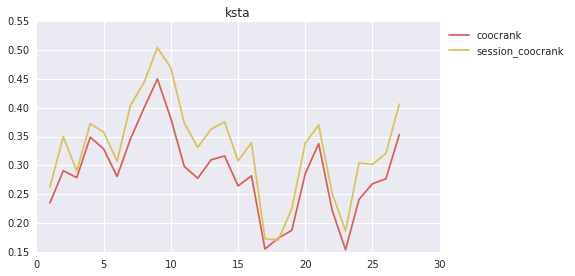

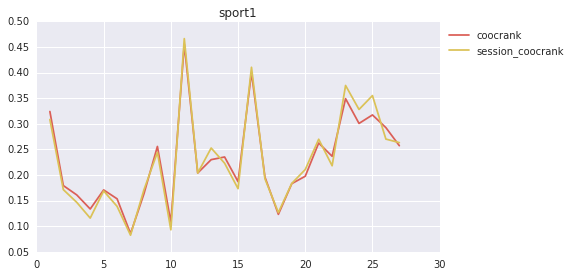

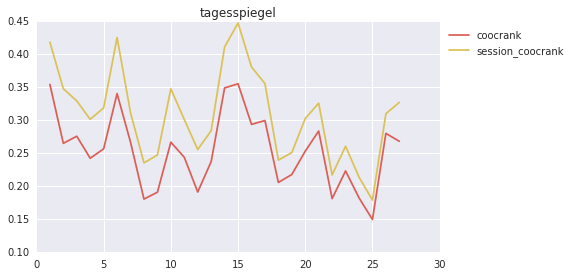

In [344]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [153]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['precision']
        print(domain_mapping[domain], ranker, np.mean(recall.values))
        

tagesspiegel coocrank 0.263203006578
tagesspiegel poprank 0.164719348428
tagesspiegel poprank_event 0.764793171799
tagesspiegel seqrank 0.348960524764
tagesspiegel contentrank 0.0072837319905
tagesspiegel session_coocrank 0.298248187355
tagesspiegel session_seqrank 0.400804965651
tagesspiegel session_mpc_event_0.5 0.641582201908
tagesspiegel mpc_event_24 0.62478745678
tagesspiegel mpcviews 0.0719550920633
tagesspiegel keyword_rec 0.0178620427147
tagesspiegel most_popular_topic 0.496513934759
ksta coocrank 0.314090779886
ksta poprank 0.306920012797
ksta poprank_event 0.807931757918
ksta seqrank 0.341741016447
ksta contentrank 0.0156489064072
ksta session_coocrank 0.323520109969
ksta session_seqrank 0.394563735372
ksta session_mpc_event_0.5 0.577833980214
ksta mpc_event_24 0.547908688921
ksta mpcviews 0.0804141204391
ksta keyword_rec 0.00218434084695
ksta most_popular_topic 0.499096128162
sport1 coocrank 0.217554226204
sport1 poprank 0.132301609042
sport1 poprank_event 0.704128451817
spo

In [396]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker_mapping[ranker], np.mean(recall.values))

mpc views 0.237447475543
mpc event 0.342291971893
seqrec 0.302829381766
poprec 0.103974576814
most clicked 0.135603325076
poprank views 0.0983423349202


In [395]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker_mapping[ranker], np.mean(precision.values))

mpc views 0.0714949751597
mpc event 0.575663349833
seqrec 0.307150970069
poprec 0.203092805394
most clicked 0.752414188219
poprank views 0.150596128401


In [390]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['cg']
    print(ranker_mapping[ranker], np.mean(precision.values))

poprec 19.7340244793
most clicked 7.16890619985
poprank views 20.2944714267


In [157]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['avggain']
    print(ranker, np.mean(precision.values))

coocrank 0.0166337713584
poprank 0.0363295394369
poprank_event 0.00223912214696
seqrank 0.014123252029
contentrank 0.0237407379153
session_coocrank 0.0195963633674
session_seqrank 0.0133083759197
session_mpc_event_0.5 0.00469594818307
mpc_event_24 0.00488406511986
mpcviews 0.0829561536868
keyword_rec 0.0636840647599
most_popular_topic 0.00472489925357
